# Assignment09
## Name : Yeon-Jee Jung
## Student ID : 20142052
## Git URL : https://github.com/YeonjeeJung/assignment09

# Import packages for plotting graphs and manipulating data :

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Setting for input data :
## Open input files

In [2]:
file_data_train = "mnist_train.csv"
file_data_test = "mnist_test.csv"

h_data_train = open(file_data_train, 'r')
h_data_test = open(file_data_test, 'r')

data_train = h_data_train.readlines()
data_test = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row = 28 # height of the image
size_col = 28 # width of the image

num_train = len(data_train) # number of training images
num_test = len(data_test) # number of testing images

## Define normalization function
Make input data to be in $[0, 1]$

In [3]:
#
# normalize the values of the input data to be [0, 1]
#

def normalize(data):
    data_normalized = (data  - min(data)) / (max(data) - min(data))
    return data_normalized

## Make train and test data matrix with input file
In MNIST, 1 image size is $28\times28$. In matrix, one column represents one image. So train data matrix size is $784\times num\_train$, and test data matrix size is $784\times num\_test$.

$matrix = \begin{bmatrix}x_1 & x_2 & \cdots & x_{num} \end{bmatrix}$, where $x_k$ is vector of one image.

If the label is '0', then final label is '1'(true). If the label is not '0', then final label is '-1'(false). 

In [4]:
#
# make a matrix each column of which represents an images in a vector form
#

list_image_train = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train = np.empty(num_train, dtype=int)

list_image_test = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test = np.empty(num_test, dtype=int)

count = 0

for line in data_train:
    line_data = line.split(',')
    label = line_data[0]
    
    if label == '0':
        label = 1
    else:
        label = -1
        
    im_vector = np.asfarray(line_data[1:])
    im_vector = normalize(im_vector)
    
    list_label_train[count] = label
    list_image_train[:, count] = im_vector
    
    count += 1
    
count = 0

for line in data_test:
    line_data = line.split(',')
    label = line_data[0]
    
    if label == '0':
        label = 1
    else:
        label = -1
        
    im_vector = np.asfarray(line_data[1:])
    im_vector = normalize(im_vector)
    
    list_label_test[count] = label
    list_image_test[:, count] = im_vector
    
    count += 1

## Show 150 train images

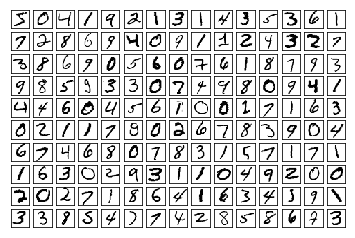

In [5]:
#
# plot first 150 images out of 10,000
#

f1 = plt.figure(1)

for i in range(150):
    label = list_label_train[i]
    im_vector = list_image_train[:, i]
    im_matrix = im_vector.reshape((size_row, size_col))
    
    plt.subplot(10, 15, i+1)
    #plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')
    
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

## Show average image of train images for 0 and others

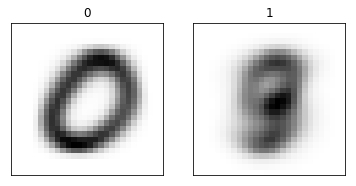

In [6]:
#
# plot the average image of all the images for 0 and others
#

f2 = plt.figure(2)

im_average = np.zeros((size_row * size_col, 2), dtype=float)
im_count = np.zeros(2, dtype=int)

for i in range(num_train):
    if list_label_train[i] == -1:
        im_average[:, 1] += list_image_train[:, i]
        im_count[1] += 1
    else:
        im_average[:, 0] += list_image_train[:, i]
        im_count[0] += 1
    
for i in range(2):
    im_average[:, i] /= im_count[i]
    
    plt.subplot(1, 2, i+1)
    plt.title(i)
    plt.imshow(
        im_average[:, i].reshape((size_row, size_col)), 
        cmap='Greys', interpolation='None'
    )
    
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    
plt.show()

# Define functions to solve Least_square problem :
We will find 
$\begin{bmatrix} s_1 \\ s_2 \\ \vdots \\ s_p \end{bmatrix}$ that minimizes $\begin{Vmatrix}\begin{bmatrix}f_1(x_1) & f_2(x_1) &\cdots &f_p(x_1) \\f_1(x_2) & f_2(x_2) &\cdots &f_p(x_2) \\\vdots & \vdots &&\vdots \\f_1(x_n) & f_2(x_n) &\cdots&f_p(x_n)\end{bmatrix}\cdot\begin{bmatrix} s_1 \\ s_2 \\ \vdots \\ s_p\end{bmatrix} - \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}\end{Vmatrix}$, 
Where $f_k(x)=\begin{bmatrix} r_1 \\ r_2 \\ \vdots \\ r_{784} \end{bmatrix} \cdot \begin{bmatrix}x_1 \\ x_2 \\ \vdots \\ x_{784}\end{bmatrix}$, $r_i$ is random normal number.

## Define norm function
This function returns norm of a vector.

In [7]:
def norm(vector):
    sum = 0
    for i in range(len(vector)):
        sum += vector[i]**2
    return np.sqrt(sum)

## Define proj function
This function returns projection of vectors.

In [8]:
def proj(e, a):
    return (np.matmul(e.T, a) / np.matmul(e.T, e))*e

## Defind randomExtractor function
This function makes random feature-extraction vectors.

In [9]:
def randomExtractor(p):
    extractor = np.random.normal(0, 1, (p, 784))
    return extractor

## Define computeQR function
This function returns the Q, R matrix from input matrix. Q is the orthonormal matrix, and R is upper triangle matrix.

In [10]:
def computeQR(matrix):
    Q = np.zeros([matrix.shape[0], matrix.shape[1]])
    R = np.zeros([matrix.shape[1], matrix.shape[1]])
    U = np.zeros([matrix.shape[1], matrix.shape[0]])
    
    for i in range(matrix.shape[1]):
        sum = 0
        Ai = matrix[:,i]
        for j in range(i):
            sum += proj(U[j], Ai)
        U[i] = Ai - sum
        
    for i in range(matrix.shape[1]):
        for j in range(matrix.shape[0]):
            Q[j][i] = U[i][j]/norm(U[i])
            
    for i in range(matrix.shape[0]):
        for j in range(i, matrix.shape[1]):
            R[i][j] = np.dot(Q[:,i], matrix[:,j])
    return Q, R

## Define findX function
This function returns x, from Q, R, and b. Q, R is from computeQR function, that makes A by multiplication. So this function can find x that satisfy least-square problem such that $A\cdot x = Q\cdot R\cdot x = b$.

In [11]:
def findX(Q, R, b):
    Rsol = np.matmul(Q.T, b)
    sol = np.zeros(Rsol.shape)
    for i in reversed(range(Rsol.shape[0])):
        a = Rsol[i]
        for j in reversed(range(i+1, Rsol.shape[0])):
            a -= sol[j]*R[i][j]
        if R[i][i] == 0:
            sol[i] = 0
        else:
            sol[i] = a / R[i][i]
    return sol

## Define F1score function
This function calculates F1 score. $F_1 = 2 \cdot \frac{precision\cdot recall}{precision+recall}$ where $precision = \frac{TP}{TP+FP}$, $recall = \frac{TP}{TP+FN}$

In [12]:
def F1score(list_TFcount):
    precision = list_TFcount[0] / (list_TFcount[0] + list_TFcount[3])
    recall = list_TFcount[0] / (list_TFcount[0] + list_TFcount[1])
    return 2*((precision * recall) / (precision + recall))

## Define TF function
This function predicts the test dataset, and evaluate the score. TP is for True Positive, TN is for True Negative, FP is for False Positive, FN is for False Negative.

In [13]:
def TF(RE, sol):
    Test = np.matmul(RE, list_image_test)
    pred = np.sign(np.matmul(Test.T, sol))

    list_TF = [None for i in range(num_test)]
    for i in range(num_test):
        if pred[i] == 1.0 and list_label_test[i] == 1:
            list_TF[i] = 'TP'
        elif pred[i] == -1.0 and list_label_test[i] == 1:
            list_TF[i] = 'FN'
        elif pred[i] == -1.0 and list_label_test[i] == -1:
            list_TF[i] = 'TN'
        elif pred[i] == 1.0 and list_label_test[i] == -1:
            list_TF[i] = 'FP'

    TFcount = [list_TF.count('TP'), list_TF.count('FP'), list_TF.count('TN'), list_TF.count('FN')]
    print("(TP, FP, TN, FN) :", TFcount)
    
    F1 = F1score(TFcount)
    print("F1 score :", F1)

    return list_TF, F1

## Define plot_TFimage function
This function plots the average image of TP, TN, FP, FN.

In [14]:
def plot_TFimage(list_TrueFalse):
    f3 = plt.figure(3)

    im_average = np.zeros((size_row * size_col, 4), dtype=float)
    im_count = np.zeros(4, dtype=int)
    im_title = ['TP', 'FP', 'TN', 'FN']

    for i in range(num_test):
        if list_TrueFalse[i] == 'TP':
            im_average[:, 0] += list_image_test[:, i]
            im_count[0] += 1
        elif list_TrueFalse[i] == 'FP':
            im_average[:, 1] += list_image_test[:, i]
            im_count[1] += 1
        elif list_TrueFalse[i] == 'TN':
            im_average[:, 2] += list_image_test[:, i]
            im_count[2] += 1
        elif list_TrueFalse[i] == 'FN':
            im_average[:, 3] += list_image_test[:, i]
            im_count[3] += 1

    for i in range(4):
        im_average[:, i] /= im_count[i]

        plt.subplot(1, 4, i+1)
        plt.title(im_title[i])
        plt.imshow(
            im_average[:, i].reshape((size_row, size_col)), 
            cmap='Greys', interpolation='None'
        )

        frame = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)

    plt.show()

# Solve Least-square problem for classification:
## Calculate F1 score for each p in $(1, 2^{12})$.

1 features
(TP, FP, TN, FN) : [73, 1904, 7116, 907]
F1 score : 0.04937436591139669


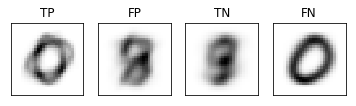

2 features
(TP, FP, TN, FN) : [77, 2296, 6724, 903]
F1 score : 0.04592901878914405


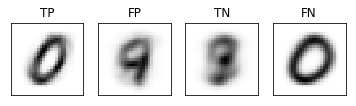

4 features
(TP, FP, TN, FN) : [142, 488, 8532, 838]
F1 score : 0.17639751552795027


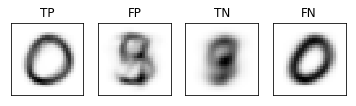

8 features
(TP, FP, TN, FN) : [434, 194, 8826, 546]
F1 score : 0.5398009950248757


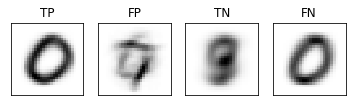

16 features
(TP, FP, TN, FN) : [506, 173, 8847, 474]
F1 score : 0.6100060277275466


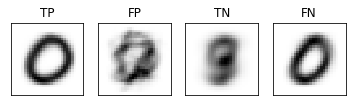

32 features
(TP, FP, TN, FN) : [651, 97, 8923, 329]
F1 score : 0.7534722222222221


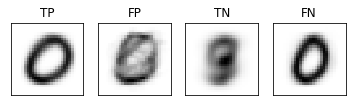

64 features
(TP, FP, TN, FN) : [847, 75, 8945, 133]
F1 score : 0.8906414300736066


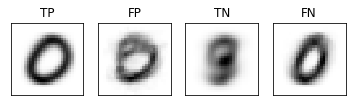

128 features
(TP, FP, TN, FN) : [877, 78, 8942, 103]
F1 score : 0.9064599483204134


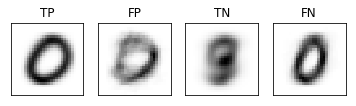

256 features
(TP, FP, TN, FN) : [903, 54, 8966, 77]
F1 score : 0.9323696437790397


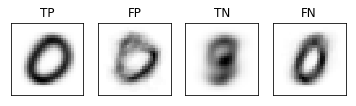

512 features
(TP, FP, TN, FN) : [916, 62, 8958, 64]
F1 score : 0.9356486210418795


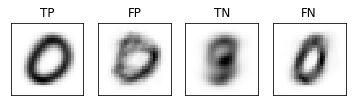

1024 features
(TP, FP, TN, FN) : [870, 35, 8985, 110]
F1 score : 0.923076923076923


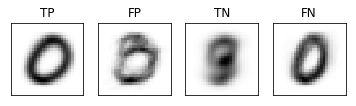

2048 features
(TP, FP, TN, FN) : [924, 82, 8938, 56]
F1 score : 0.930513595166163


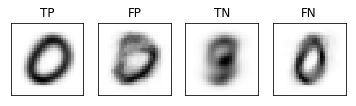

4096 features
(TP, FP, TN, FN) : [711, 166, 8854, 269]
F1 score : 0.765751211631664


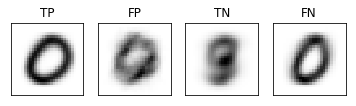

In [15]:
for i in range(13):
    print(str(2**i), "features")
    RE = randomExtractor(2**i)
    A = np.matmul(RE, list_image_train)
    Q, R = np.linalg.qr(A.T)
    sol = findX(Q, R, list_label_train)
    list_TF, F1 = TF(RE, sol)
    plot_TFimage(list_TF)

## Since F1 score of 512 features is highest, calculate F1 score for each p in $(200, 1000)$.

200 features
(TP, FP, TN, FN) : [897, 62, 8958, 83]
F1 score : 0.925219185146983


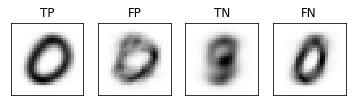

300 features
(TP, FP, TN, FN) : [900, 67, 8953, 80]
F1 score : 0.9244992295839753


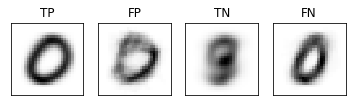

400 features
(TP, FP, TN, FN) : [914, 58, 8962, 66]
F1 score : 0.9364754098360656


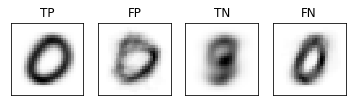

500 features
(TP, FP, TN, FN) : [916, 61, 8959, 64]
F1 score : 0.9361267245784365


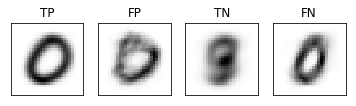

600 features
(TP, FP, TN, FN) : [918, 60, 8960, 62]
F1 score : 0.9376915219611849


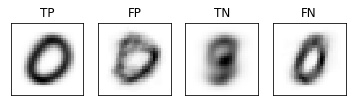

700 features
(TP, FP, TN, FN) : [917, 61, 8959, 63]
F1 score : 0.9366700715015321


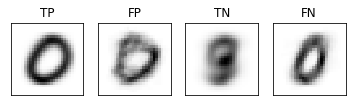

800 features
(TP, FP, TN, FN) : [906, 50, 8970, 74]
F1 score : 0.9359504132231405


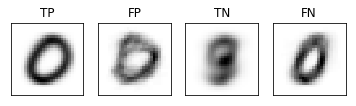

900 features
(TP, FP, TN, FN) : [916, 56, 8964, 64]
F1 score : 0.9385245901639344


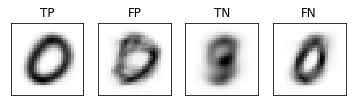

1000 features
(TP, FP, TN, FN) : [909, 90, 8930, 71]
F1 score : 0.9186457806973218


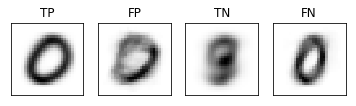

In [16]:
best_i = 0
best_F1 = 0

for i in range(200, 1001, 100):
    print(str(i), "features")
    RE = randomExtractor(i)
    A = np.matmul(RE, list_image_train)
    Q, R = np.linalg.qr(A.T)
    sol = findX(Q, R, list_label_train)
    list_TF, F1 = TF(RE, sol)
    if F1 > best_F1:
        best_F1 = F1
        best_i = i
    plot_TFimage(list_TF)

## Since F1 score of 900 features is highest, calculate F1 score for each p in $(800, 1000)$.

800 features
(TP, FP, TN, FN) : [916, 59, 8961, 64]
F1 score : 0.937084398976982


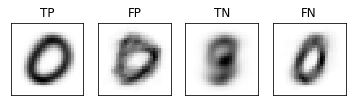

820 features
(TP, FP, TN, FN) : [914, 51, 8969, 66]
F1 score : 0.9398457583547558


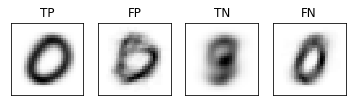

840 features
(TP, FP, TN, FN) : [908, 64, 8956, 72]
F1 score : 0.9303278688524591


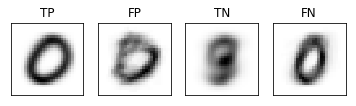

860 features
(TP, FP, TN, FN) : [922, 78, 8942, 58]
F1 score : 0.9313131313131313


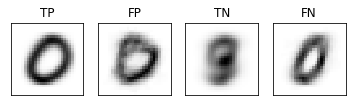

880 features
(TP, FP, TN, FN) : [902, 60, 8960, 78]
F1 score : 0.9289392378990731


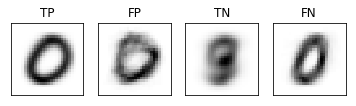

900 features
(TP, FP, TN, FN) : [916, 73, 8947, 64]
F1 score : 0.930421533773489


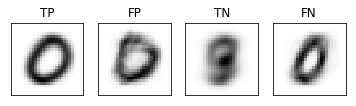

920 features
(TP, FP, TN, FN) : [913, 68, 8952, 67]
F1 score : 0.9311575726670066


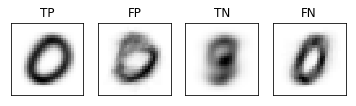

940 features
(TP, FP, TN, FN) : [897, 73, 8947, 83]
F1 score : 0.9199999999999999


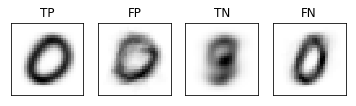

960 features
(TP, FP, TN, FN) : [888, 56, 8964, 92]
F1 score : 0.9230769230769231


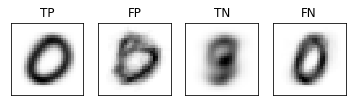

980 features
(TP, FP, TN, FN) : [926, 73, 8947, 54]
F1 score : 0.9358261748357756


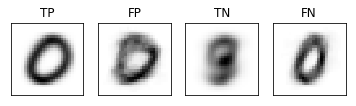

1000 features
(TP, FP, TN, FN) : [916, 68, 8952, 64]
F1 score : 0.9327902240325866


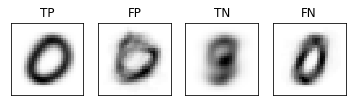

In [17]:
best_i_2 = 0
best_F1_2 = 0

for i in range(best_i-100, best_i+101, 20):
    print(str(i), "features")
    RE = randomExtractor(i)
    A = np.matmul(RE, list_image_train)
    Q, R = np.linalg.qr(A.T)
    sol = findX(Q, R, list_label_train)
    list_TF, F1 = TF(RE, sol)
    if F1 > best_F1_2:
        best_F1_2 = F1
        best_i_2 = i
    plot_TFimage(list_TF)

## Since F1 score of 820 features is highest, calculate F1 score for each p in $(800, 840)$.

800 features
(TP, FP, TN, FN) : [914, 69, 8951, 66]
F1 score : 0.9312277126846663


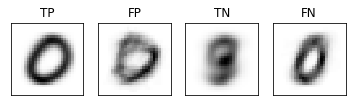

804 features
(TP, FP, TN, FN) : [930, 76, 8944, 50]
F1 score : 0.9365558912386707


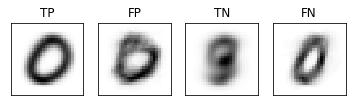

808 features
(TP, FP, TN, FN) : [904, 59, 8961, 76]
F1 score : 0.930519814719506


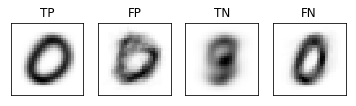

812 features
(TP, FP, TN, FN) : [936, 76, 8944, 44]
F1 score : 0.9397590361445783


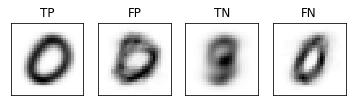

816 features
(TP, FP, TN, FN) : [909, 63, 8957, 71]
F1 score : 0.9313524590163934


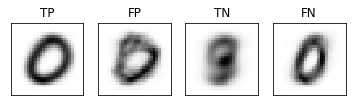

820 features
(TP, FP, TN, FN) : [923, 63, 8957, 57]
F1 score : 0.9389623601220752


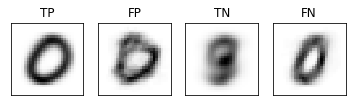

824 features
(TP, FP, TN, FN) : [913, 52, 8968, 67]
F1 score : 0.9388174807197944


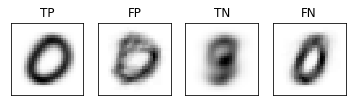

828 features
(TP, FP, TN, FN) : [927, 68, 8952, 53]
F1 score : 0.9387341772151898


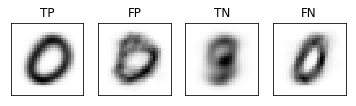

832 features
(TP, FP, TN, FN) : [907, 52, 8968, 73]
F1 score : 0.9355337802991232


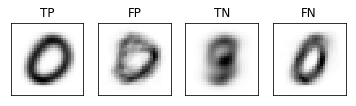

836 features
(TP, FP, TN, FN) : [917, 67, 8953, 63]
F1 score : 0.9338085539714868


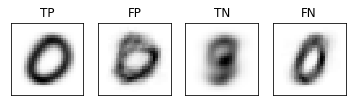

840 features
(TP, FP, TN, FN) : [918, 67, 8953, 62]
F1 score : 0.934351145038168


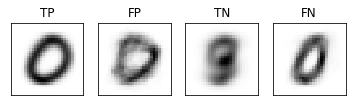

In [18]:
best_i_3 = 0
best_F1_3 = 0

for i in range(best_i_2-20, best_i_2+21, 4):
    print(str(i), "features")
    RE = randomExtractor(i)
    A = np.matmul(RE, list_image_train)
    Q, R = np.linalg.qr(A.T)
    sol = findX(Q, R, list_label_train)
    list_TF, F1 = TF(RE, sol)
    if F1 > best_F1_3:
        best_F1_3 = F1
        best_i_3 = i
    plot_TFimage(list_TF)

## Since F1 score of 820 features is highest, calculate F1 score for each p in $(816, 824)$.

816 features
(TP, FP, TN, FN) : [918, 71, 8949, 62]
F1 score : 0.9324530218384967


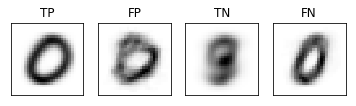

817 features
(TP, FP, TN, FN) : [907, 57, 8963, 73]
F1 score : 0.9331275720164609


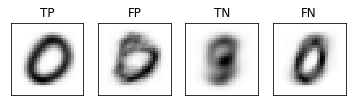

818 features
(TP, FP, TN, FN) : [924, 61, 8959, 56]
F1 score : 0.9404580152671755


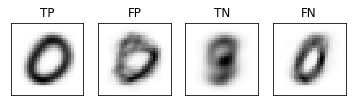

819 features
(TP, FP, TN, FN) : [907, 54, 8966, 73]
F1 score : 0.93456980937661


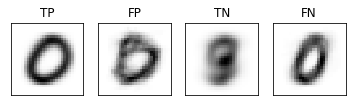

820 features
(TP, FP, TN, FN) : [920, 57, 8963, 60]
F1 score : 0.9402146142054163


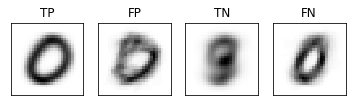

821 features
(TP, FP, TN, FN) : [916, 58, 8962, 64]
F1 score : 0.9375639713408392


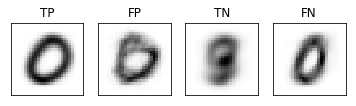

822 features
(TP, FP, TN, FN) : [905, 57, 8963, 75]
F1 score : 0.9320288362512874


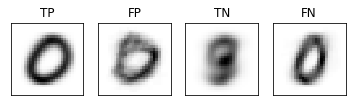

823 features
(TP, FP, TN, FN) : [908, 70, 8950, 72]
F1 score : 0.9274770173646579


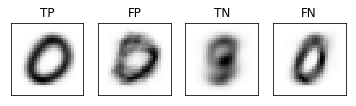

824 features
(TP, FP, TN, FN) : [921, 73, 8947, 59]
F1 score : 0.933130699088146


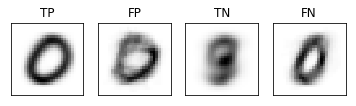

best F1 is 0.9404580152671755 , best feature number is 818


In [19]:
best_i_4 = 0
best_F1_4 = 0

for i in range(best_i_2-4, best_i_2+5):
    print(str(i), "features")
    RE = randomExtractor(i)
    A = np.matmul(RE, list_image_train)
    Q, R = np.linalg.qr(A.T)
    sol = findX(Q, R, list_label_train)
    list_TF, F1 = TF(RE, sol)
    if F1 > best_F1_4:
        best_F1_4 = F1
        best_i_4 = i
    plot_TFimage(list_TF)
    
print("best F1 is", best_F1_4, ", best feature number is", best_i_4)